# Cygnus maximum likelyhood estimation analysis 

## Hypotesis
There is a probable flare from Cygnus X-3.

Check http://www.astronomerstelegram.org/?read=13458

## Dependencies

In [1]:
from agilepy.api.AGAnalysis import AGAnalysis

In [2]:
from os.path import expandvars
from pathlib import Path
import shutil

In [3]:
%matplotlib notebook

## Data

In [4]:
timetype = "MJD"
tmin = 58884.0   # 2020-02-05 00:00:00.000
tmax = 58886.0   # 2020-02-07 00:00:00.000

In [5]:
l = 79.8
b = 0.7

In [6]:
sources_hypotesis = """
15.7017e-08 80.3286 1.12047 2.16619 0 2 _2AGLJ2032+4135 0 0 0 0 0.5 5 20 10000 0 100
16.9737e-08 79.3 0.55 2.1 3 2 CYGX3 0 0 0 0 0.5 5 20 10000 0 100
119.303e-08 78.2375 2.12298 1.75823 0 2 _2AGLJ2021+4029 0 1 3307.63 0 0.5 5 20 10000 0 100
"""

In [7]:
log_index = "/AGILE_PROC3/DATA_ASDC2/INDEX/LOG.log.index"
evt_index = "/AGILE_PROC3/FM3.119_ASDC2/INDEX/EVT.index"

## Directories

In [8]:
out_dir = expandvars("$HOME/agilepy_analysis/cygnus/output")
work_dir = expandvars("$HOME/agilepy_analysis/cygnus/conf")


if Path(out_dir).exists():
    print("Deleting",out_dir)
    shutil.rmtree(out_dir)


Path(work_dir).mkdir(parents=True, exist_ok=True)
print("Working directory:", work_dir)

Deleting /home/rt/agilepy_analysis/cygnus/output
Working directory: /home/rt/agilepy_analysis/cygnus/conf


## Configuration file

In [9]:
configurationFilePath = Path(work_dir).joinpath("agilepy_conf.yaml")

In [10]:
conf_file = """
input:
  evtfile: %s
  logfile: %s

output:
  outdir: %s
  filenameprefix: cygnus_analysis
  logfilenameprefix: cygnus_analysis
  verboselvl: 1

model:
  galcoeff: -1
  isocoeff: -1
  
maps:
  binsize: 0.25
  
selection:
  tmin: %f
  tmax: %f
  timetype: %s
  glon: %f
  glat: %f
  
mle:
  loccl: 95
  
"""%(evt_index, log_index, out_dir, tmin, tmax, timetype, l, b)

In [11]:
with open(configurationFilePath , "w") as cf:
    cf.write(conf_file)

## Sources file

In [12]:
sourcesFilePath = Path(work_dir).joinpath("sources.txt")
print(sourcesFilePath)

/home/rt/agilepy_analysis/cygnus/conf/sources.txt


In [13]:
with open(sourcesFilePath, "w") as sf:
    sf.write(sources_hypotesis)

## Starting the analysis

In [14]:
ag = AGAnalysis(str(configurationFilePath), str(sourcesFilePath))

2020-02-27 10:56:36,626 [INFO    ] [AgilepyLogger] File and Console loggers are active. Log file: /home/rt/agilepy_analysis/cygnus/output/logs/cygnus_analysis_20200227-105636.log
2020-02-27 10:56:36,628 [INFO    ] [PlottingUtils] Plot configuration: 'standard'. fig_width_pt: 426.791340 fontsize:9.000000


In [17]:
# isoBkg, galBkg = aga.calcBkg('CYGX3')
# print(f"iso: {isoBkg} gal: {galBkg}")

iso = [7.50346]
gal = [0.640153]

ag.setOptions(isocoeff = iso,galcoeff = gal)

## Map generation

In [18]:
ag.printOptions("maps")

{ 'binsize': 0.25,
  'energybins': [[100, 10000]],
  'expstep': 4.0,
  'fovbinnumber': 1,
  'mapsize': 40,
  'offaxisangle': 30,
  'spectralindex': 2.1,
  'timestep': 160,
  'useEDPmatrixforEXP': True}


In [19]:
maplistfile = ag.generateMaps()

2020-02-27 10:58:17,256 [INFO    ] [CtsMapGenerator] Science tool called!
2020-02-27 10:58:19,113 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced ['/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.cts.gz']
2020-02-27 10:58:19,115 [INFO    ] [ExpMapGenerator] Science tool called!
2020-02-27 10:58:28,818 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced ['/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.exp.gz']
2020-02-27 10:58:28,820 [INFO    ] [GasMapGenerator] Science tool called!
2020-02-27 10:58:29,995 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced ['/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.gas.gz']
2020-02-27 10:58:29,997 [INFO    ] [IntMapGenerator] Science tool called!
2020-02-27 10:58:30,356 [INFO    ] [AGAnalysis] Science tool intMapGenerator produced ['/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EM

In [20]:
maplistfile

'/home/rt/agilepy_analysis/cygnus/output/cygnus_analysis.maplist4'

In [21]:
!cat /home/rt/agilepy_analysis/cygnus/output/cygnus_analysis.maplist4

/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.cts.gz /home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.exp.gz /home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.gas.gz 30 0.640153 7.50346


In [22]:
maps = ag.getSkyMaps()
maps

[['/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.cts.gz',
  '/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.exp.gz',
  '/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.gas.gz']]

In [23]:
cts_map = maps[0][0]
exp_map = maps[0][1]

2020-02-27 10:58:47,280 [INFO    ] [PlottingUtils] Plot configuration: 'standard'. fig_width_pt: 426.791340 fontsize:9.000000


<IPython.core.display.Javascript object>


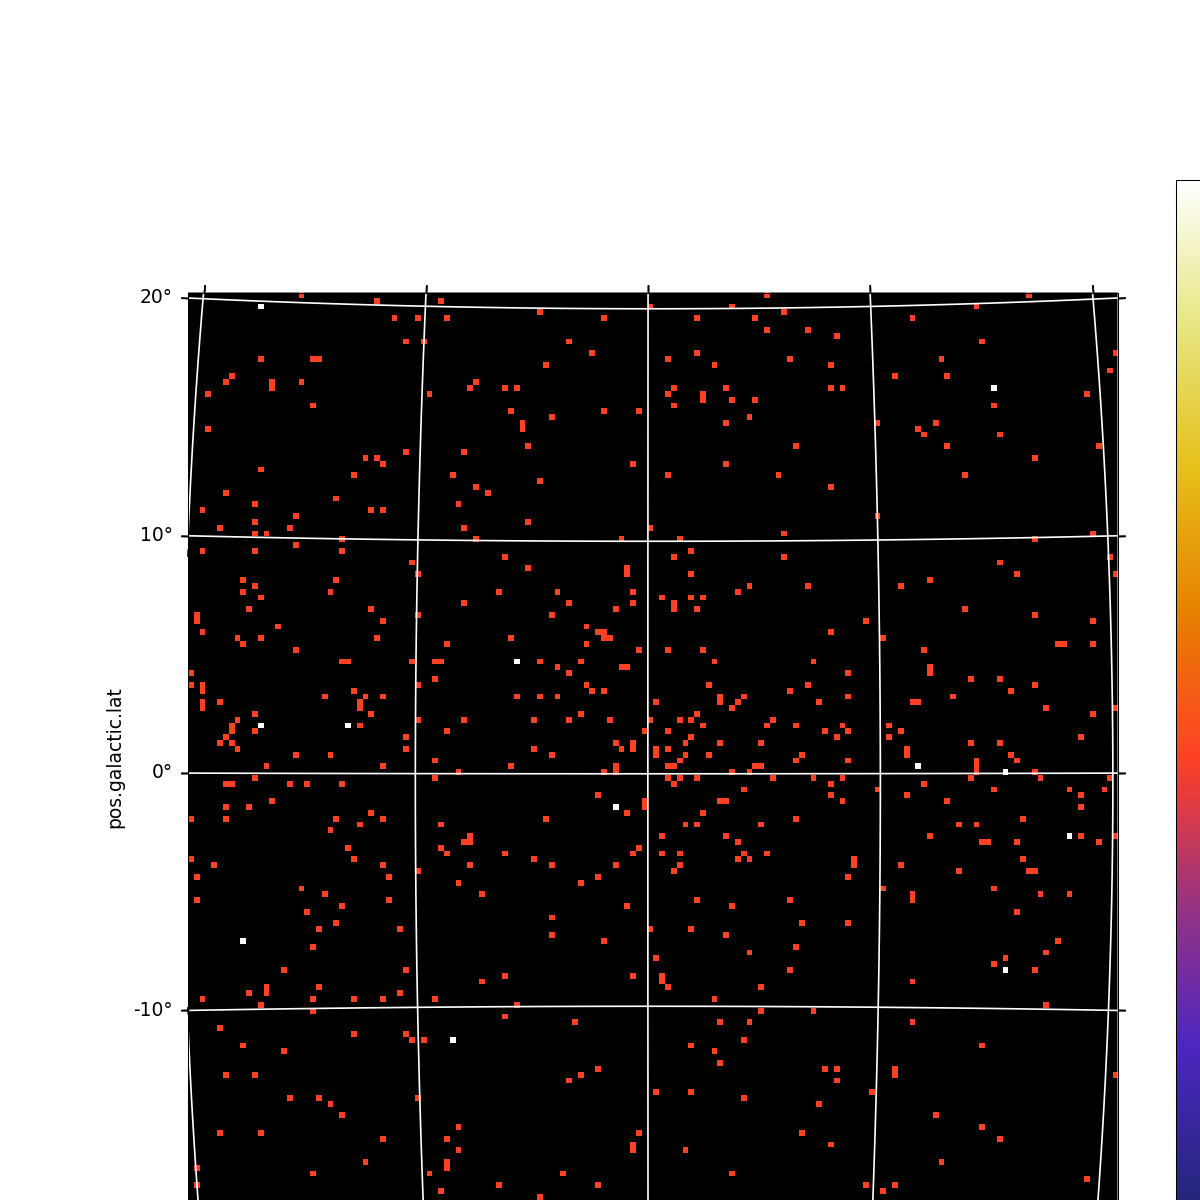

In [24]:
ag.displaySkyMap(cts_map)

2020-02-27 10:58:53,290 [INFO    ] [PlottingUtils] Plot configuration: 'standard'. fig_width_pt: 426.791340 fontsize:9.000000


<IPython.core.display.Javascript object>


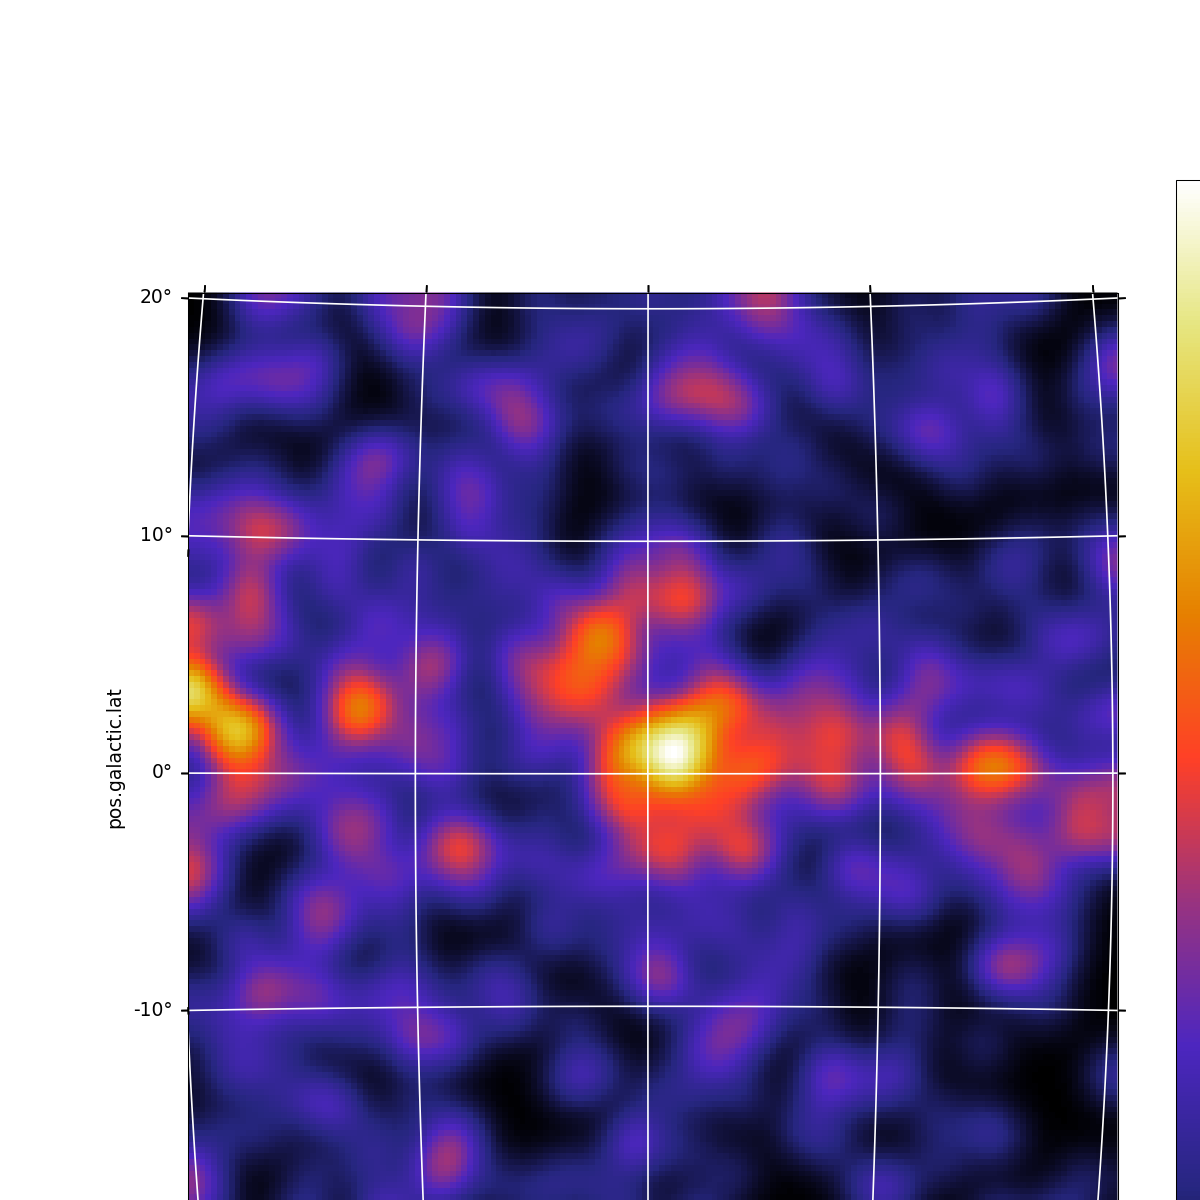

In [25]:
ag.displaySkyMap(cts_map, smooth=3)

2020-02-27 10:58:57,147 [INFO    ] [PlottingUtils] Plot configuration: 'standard'. fig_width_pt: 426.791340 fontsize:9.000000


<IPython.core.display.Javascript object>


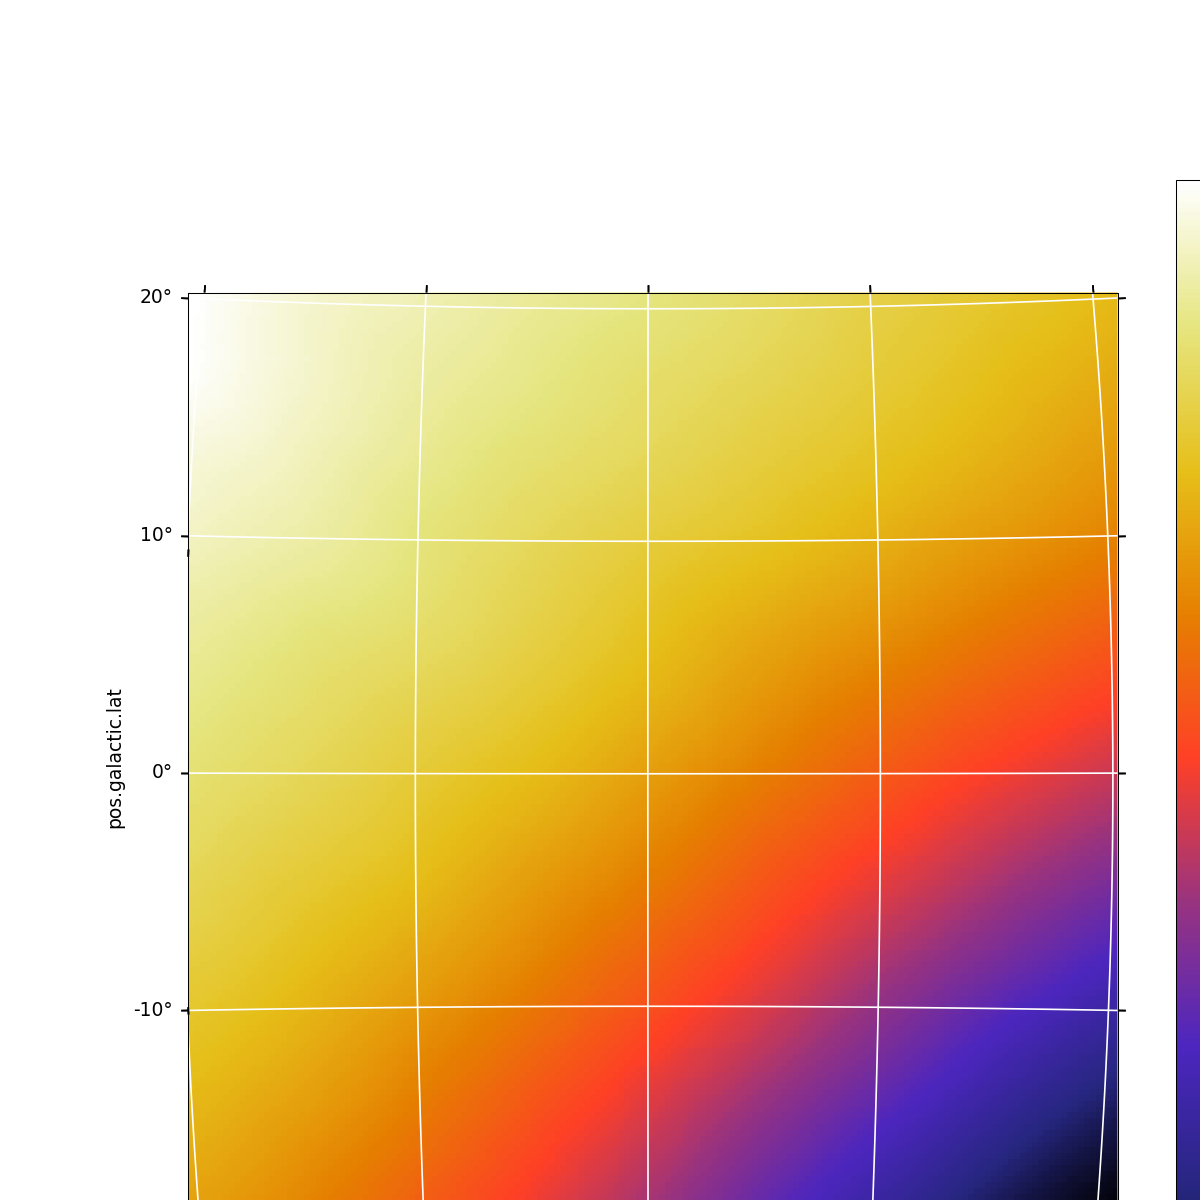

In [26]:
ag.displaySkyMap(exp_map)

## Maximum likelihood analysis

In [27]:
ag.mle()

2020-02-27 10:58:59,963 [INFO    ] [SourcesLibrary] File /home/rt/agilepy_analysis/cygnus/output/sourceLibrary00000.txt has been produced
2020-02-27 10:58:59,964 [INFO    ] [Multi] Science tool called!
2020-02-27 10:59:05,168 [INFO    ] [AGAnalysis] AG_multi produced: ['/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2032+4135.source', '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000_CYGX3.source', '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2021+4029.source']
2020-02-27 10:59:05,175 [INFO    ] [AGAnalysis] Took 5.214720 seconds.


['/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2032+4135.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000_CYGX3.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2021+4029.source']

In [28]:
sources = ag.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: CYGX3 (PointSource) => sqrt(ts): 3.20301
  * Position:
	- start_pos: (79.3, 0.55)
  * Spectrum: (PowerLaw)
	- flux: 1.69737e-07
	- index: 2.1
  * Free params: flux pos
  * Multi analysis:
	- flux: 2.43894e-06 +- 1.02089e-06
	- upper limit: 4.76414e-06
	- ergLog: 3.94173e-10 +- 1.64992e-10
	- galCoeff: [0.640153]
	- isoCoeff: [7.50346]
	- L_peak: 78.9289
	- B_peak: 0.326087
	- distFromStartPos: 0.433441
	- L: 78.8893
	- B: 0.502215
	- distFromStartPos: 0.413462
	- r: 1.03352
	- a: 0.920703
	- b: 1.14134
	- phi: -22.5638
-----------------------------------------------------------


In [29]:
sources = ag.freeSources('name == "CYGX3"', "pos", True)

In [30]:
ag.mle(maplistfile)

2020-02-27 10:59:18,266 [INFO    ] [SourcesLibrary] File /home/rt/agilepy_analysis/cygnus/output/sourceLibrary00000.txt has been produced
2020-02-27 10:59:18,267 [INFO    ] [Multi] Science tool called!
2020-02-27 10:59:23,025 [INFO    ] [AGAnalysis] AG_multi produced: ['/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2032+4135.source', '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000_CYGX3.source', '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2021+4029.source']
2020-02-27 10:59:23,030 [INFO    ] [AGAnalysis] Took 4.766000 seconds.


['/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2032+4135.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000_CYGX3.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2021+4029.source']

In [31]:
sources = ag.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: CYGX3 (PointSource) => sqrt(ts): 3.20301
  * Position:
	- start_pos: (79.3, 0.55)
  * Spectrum: (PowerLaw)
	- flux: 1.69737e-07
	- index: 2.1
  * Free params: flux pos
  * Multi analysis:
	- flux: 2.43895e-06 +- 1.02089e-06
	- upper limit: 4.76414e-06
	- ergLog: 3.94174e-10 +- 1.64992e-10
	- galCoeff: [0.640153]
	- isoCoeff: [7.50346]
	- L_peak: 78.9288
	- B_peak: 0.326121
	- distFromStartPos: 0.43345
	- L: 78.8899
	- B: 0.503064
	- distFromStartPos: 0.412774
	- r: 1.0341
	- a: 1.1478
	- b: 0.926559
	- phi: 67.9835
-----------------------------------------------------------


## Light curve

In [ ]:
ag.lightCurve("CYGX3", binsize=43200)

In [ ]:
! cat /home/rt/agilepy_analysis/cygnus/output/lc/light_curve_507945600_508118400.txt 